# How do you measure classification models

## Accuracy

 The simplest and most common measure of classification models. The accuracy of a model is the percentage of times that a model is correct.  In other words, it is the ratio between the number of correctly predicted data points and the total number of data points.
 For example, if we evaluate a model on a test dataset of 1,000 samples, and the model predicted the correct label of the samples 875 times, then this model has an accuracy of 875/1000 = 0.875, or 87.5%.

## How to fix the accuracy problem? Defining different types of errors and how to measure them

The first thing we need to study is types of errors. In the next section, we see that some errors are more critical than others. Then in the sections “Storing the correctly and incorrectly




### False positives and false negatives: Which one is worse?

In many cases, the total number of errors doesn’t tell us everything about the model’s performance, and we need to dig in deeper and identify certain types of errors in different ways. In this section, we see two types of errors. What are the two types of errors that the coronavirus model can make? It can diagnose a healthy person as sick or a sick person as healthy. In our model, we label the sick patients as positive, by convention. The two error types are called false positives and negatives, as follows:

- False positive: a healthy person who is incorrectly diagnosed as sick
- False negative: a sick person who is incorrectly diagnosed as healthy

In the general setting, a false positive is a data point that has a negative label, but the model falsely classifies it as positive. A false negative is a data point that has a positive label, but the model falsely classified it as negative. Naturally, the cases that are correctly diagnosed also have names, as follows:

- True positive: a sick person who is diagnosed as sick
- True negative: a healthy person who is diagnosed as healthy

Now, let’s look at the email dataset. Let’s say we have a model that predicts whether each email is spam or ham. We consider the positives to be the spam emails. Therefore, our two types of errors follow:

- False positive: a ham email that is incorrectly classified as spam
- False negative: a spam email that is incorrectly classified as ham

And the correctly classified emails are the following:

- True positive: a spam email that is correctly classified as spam
- True negative: a ham email that is correctly classified as ham


 **Let’s say that when we diagnose a patient as healthy, we send them home with no treatment, and that when we diagnose a patient as sick, we send them for more tests. n the coronavirus model, a false negative is much worse than a false positive.**

 **Now we’ll do the same analysis on the spam model. In this case, let’s say that if our spam classifier classifies an email as spam, then this email is automatically deleted. in the spam email model, a false positive is much worse than a false negative.**

 This is where the two models differ. In the coronavirus model, a false negative is worse, whereas in the spam email model, a false positive is worse. The problem with measuring the accuracy in any of these two models is that the accuracy considers both types of errors as equally serious and doesn’t tell them apart.


### The confusion matrix


Person’s condition | Predicted positive       | Predicted negative       |
|--------------------|--------------------------|--------------------------|
| Positive           | Number of true positives | Number of false negatives |
| Negative           | Number of false positives | Number of true negatives |


------------------------------------------------------------------------------------------------------

| Coronavirus model 1 | Diagnosed sick (predicted positive) | Diagnosed healthy (predicted negative) |
|---------------------|-------------------------------------|----------------------------------------|
| Sick (positive)     | 0 (number of true positives)        | 10 (number of false negatives)         |
| Healthy (negative)  | 0 (number of false positives)       | 990 (number of true negatives)         |

------------------------------------------------------------------------------------------------------
| Coronavirus model 2 | Diagnosed sick (predicted positive) | Diagnosed healthy (predicted negative) |
|---------------------|-------------------------------------|----------------------------------------|
| Sick (positive)     | 8 (number of true positives)        | 2 (number of false negatives)         |
| Healthy (negative)  | 48 (number of false positives)       | 942 (number of true negatives)         |

------------------------------------------------------------------------------------------------------
| Spam model 1 | Predicted spam          | Predicted ham           |
|--------------|--------------------------|--------------------------|
| Spam         | 30 (true positives)      | 10 (false negatives)     |
| Ham          | 5 (false positives)      | 55 (true negatives)      |
------------------------------------------------------------------------------------------------------
| Spam model 2 | Predicted spam          | Predicted ham           |
|--------------|--------------------------|--------------------------|
| Spam         | 35 (true positives)      | 5 (false negatives)      |
| Ham          | 10 (false positives)     | 50 (true negatives)      |
------------------------------------------------------------------------------------------------------
| Actual \ Predicted | Dog                      | Cat                      | Bird                     |
|--------------------|--------------------------|--------------------------|--------------------------|
| **Dog**            | Number of true positives | Number of false negatives (Dog→Cat) | Number of false negatives (Dog→Bird) |
| **Cat**            | Number of false negatives (Cat→Dog) | Number of true positives | Number of false negatives (Cat→Bird) |
| **Bird**           | Number of false negatives (Bird→Dog) | Number of false negatives (Bird→Cat) | Number of true positives |
------------------------------------------------------------------------------------------------------

For problems with more classes, we have a larger confusion matrix. For example, if our model classifies images into aardvarks, birds, cats, and dogs, then our confusion matrix is a four-by-four matrix, where along the rows we have the true labels (the type of animal), and along the columns we have the predicted labels (the type of animal that the model predicted). This confusion matrix also has the property that the correctly classified points are counted in the diagonal, and the incorrectly classified are counted off the diagonal.

## Recall: Among the positive examples, how many did we correctly classify?

This is the key. This new metric, called recall, measures precisely that: out of the sick people, how many did our model diagnose correctly?

Recall finds the proportion of correct predictions among the data points with a positive label.

Recall = True positives / True positives + False negatives

because the False negatives should be Positives

Coronavirus Model 1:

True positives (sick patients diagnosed sick and sent for more tests) = 0

False negatives (sick patients diagnosed healthy and sent home) = 10

Recall = 0/10 = 0%

Coronavirus Model 2:

True positives (sick patients diagnosed sick and sent for more tests) = 8

False negatives (sick patients diagnosed healthy and sent home) = 2

Recall = 8/10 = 80%

Models like the coronavirus model, in which false negatives are much more expensive than false positives, are high recall models.

**could we fool this metric in the same way we fooled accuracy? In other words, can we build a model that has total recall? Well, get ready for a surprise, because we can. If we build a model that diagnoses every patient as sick, this model has a 100% recall. However, this model is terrible, too, because although it has zero false negatives, it has too many false positives to make it a good model**

## Precision: Among the examples we classified as positive, how many did we correctly classify?

we learn about a similar metric, precision, which measures how well our model does with false positives. We’ll use this metric to evaluate the spam email model, because this model can’t afford to have too many false positives.

Precision = True positives / True positves + false positives

Spam Model 1:

True positives (spam emails deleted) = 30
False positives (ham emails deleted) = 5
Precision = 30/35 = 85.7%
Spam Model 2:

True positives (spam emails deleted) = 35
False positives (ham emails deleted) = 10
Precision = 35/45 = 77.7%

Just as we thought: precision gave a higher score to the first model than to the second model. We conclude that models like the spam model, in which false positives are much more expensive than false negatives, are high precision models

** we can also trick precision. Consider the following spam filter: a spam filter that never detects any spam. What is the precision of this model? This is complicated, because there are zero spam emails deleted (zero true positives) and zero ham emails deleted (zero false positives). We won’t attempt to divide zero over zero, because this book would burst into flames, but by convention, a model that makes no false positive mistakes has a precision of 100%. But, of course, a spam filter that does nothing is not a good spam filter.**

This goes to show that no matter how good our metrics are, they can always be fooled. That doesn’t mean they don’t work. Accuracy, precision, and recall are useful tools in a data scientist’s toolbox. It is up to us to decide which ones are good for our model, by deciding what errors are more expensive than others. Always be careful to not fall into the trap of thinking that a model is good before evaluating it with different metrics.

## Combining recall and precision as a way to optimize both: The F-score

we discuss the F-score, a metric that combines both recall and precision

A good model is one that has good recall and good precision.

 in real life, both are important, even if they are important to different degrees. For example, we may want a model that doesn’t misdiagnose any sick person but that also doesn’t misdiagnose too many healthy people, because misdiagnosing a healthy person may involve unnecessary and painful testing, or even an unnecessary surgery, which could affect their health negatively. In the same way, we may want a model that doesn’t delete any of our good emails. But to be a good spam filter, it still needs to catch a lot of spam; otherwise, it’s useless. The F-score has a parameter β accompanying it, so the more common term is Fβ-score. When β = 1, it is called the F1-score.


 A quantity that is like the average of two numbers is called the harmonic mean. Whereas the average of two numbers a and b is (a + b)/2, their harmonic mean is 2ab/(a + b).

 F1-score = 2ab / (a + b).


 F1 = 2 * precision * recall / precision + recall

 If both numbers are high, the F1-score is high. However, if one of them is low, the F1-score will be low. The purpose of the F1-score is to measure if both recall and precision are high and to ring a bell when one of these two scores is low.

## Calculating the Fβ-score

In the previous subsection, we learned about the F1-score, a score that combines recall and precision, for the purpose of evaluating a model. However, sometimes we want more recall than precision, or vice versa

This means that sometimes we may want a model that cares both about false positives and false negatives but assigns more weight to one of them. For example, the coronavirus model cares much more about false negatives, because people’s lives may depend on a correct identification of the virus, but it still doesn’t want to create too many false positives, because we may not want to spend excessive resources retesting healthy people

The point of β is to act as a dial that we turn to emphasize precision or recall. More specifically, if we slide the β dial to zero, we get full precision; if we slide it to infinity, we get full recall. In general, the lower the value of β, the more we emphasize precision, and the higher the value of β, the more we emphasize recall.

Fβ = ((1 + β²) * P * R) / (β² * P + R)

- Si β = 1, se obtiene el clásico F<sub>1</sub>-score, que balancea precisión y recall por igual.

- Si β > 1, se da más peso al recall.

- Si β < 1, se da más peso a la precisión.

- β² → ∞ ⇒ F<sub>β</sub> ≈ Recall
- β² → 0 ⇒ F<sub>β</sub> ≈ Precision

In [5]:
def calc_accuracy(num_predict_right, n):
    if n == 0:
        return 0.0
    return num_predict_right / n

def calc_recall(true_positive, false_negative):
    if true_positive + false_negative == 0:
        return 0.0
    return true_positive / (true_positive + false_negative)

def calc_precision(true_positive, false_positive):
    if true_positive + false_positive == 0:
        return 0.0
    return true_positive / (true_positive + false_positive)

def calc_f1_score(precision, recall):
    if precision + recall == 0:
        return 0.0
    return 2 * (precision * recall) / (precision + recall)

def calc_f_beta_score(precision, recall, beta):
    if precision + beta**2 * recall == 0:
        return 0.0
    return (1 + beta**2) * (precision * recall) / (beta**2 * precision + recall)

## The receiver operating characteristic (ROC) curve

A way to optimize sensitivity and specificity in a model

Sensitivity (true positive rate): the capacity of the test to identify the positively labeled points. This is the ratio between the number of true positives and the total number of positives. (Note: this is the same as recall). it's the same that recall; “Recall is sensitivity, but precision and specificity are different.”

**Sensitivity (true positive rate) = true positive / true positive + false negative**

Specificity (true negative rate): the capacity of the test to identify the negatively labeled points. This is the ratio between the number of true negatives and the total number of negatives.

**Specificity (true negative rate) = true negative / true negative + false positive**

**The first and only assumption we need to make about our model is that it returns the prediction as a continuous value, namely, as a probability.--

- lower threadhold implying  high sensitivity (few false negativesand and many negative)

In [6]:
def calc_sensitive(true_positive, false_negative):
    if true_positive + false_negative == 0:
        return 0.0
    return true_positive / (true_positive + false_negative)

def calc_specificity(true_negative, false_positive):
    if true_negative + false_positive == 0:
        return 0.0
    return true_negative / (true_negative + false_positive)


For example, when we think of recall, think of a car company that made a car with a fatal design flaw. They need to find all the faulty cars and recall them. If they accidentally get more cars that are not faulty, they simply return them. However, not finding one of the faulty cars would be terrible. Thus, recall cares about finding all the positively labeled examples. This represents a model with high recall.

On the other hand, if we work for this car company, and we went a little overboard and started recalling all the cars, our boss may come over and say, “Hey, you are sending too many cars to fix, and we are running out of resources. Can you please be more selective and send me precisely those that are faulty?” Then we need to add precision to the model and try to find only the ones that are faulty, even if we accidentally miss some of the faulty ones (hopefully not!). This represents a model with high precision.

When it comes to specificity and sensitivity, think of an earthquake sensor that beeps every time there is an earthquake. This sensor is tremendously sensitive. If a butterfly sneezes in the next house, the sensor beeps. This sensor will capture all the earthquakes for sure, but it will also capture many other things that are not an earthquake. This represents a model with high sensitivity.

![Confusion's Matriz](../../../images/Confusion%20Matriz.PNG)

Dataset creado:
    Step  True_positives  Sensitivity  True_negatives  Specificity
0      0               5          1.0               0          0.0
1      1               5          1.0               1          0.2
2      2               4          0.8               1          0.2
3      3               4          0.8               2          0.4
4      4               4          0.8               3          0.6
5      5               3          0.6               3          0.6
6      6               3          0.6               4          0.8
7      7               2          0.4               4          0.8
8      8               2          0.4               5          1.0
9      9               1          0.2               5          1.0
10    10               0          0.0               5          1.0


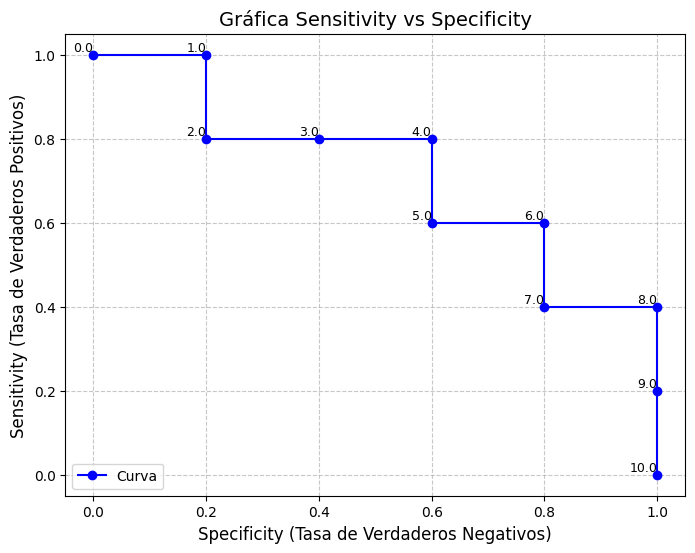

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear el DataFrame con los datos proporcionados
data = {
    'Step': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'True_positives': [5, 5, 4, 4, 4, 3, 3, 2, 2, 1, 0],
    'Sensitivity': [1, 1, 0.8, 0.8, 0.8, 0.6, 0.6, 0.4, 0.4, 0.2, 0],
    'True_negatives': [0, 1, 1, 2, 3, 3, 4, 4, 5, 5, 5],
    'Specificity': [0, 0.2, 0.2, 0.4, 0.6, 0.6, 0.8, 0.8, 1, 1, 1]
}

df = pd.DataFrame(data)

# Mostrar el DataFrame
print("Dataset creado:")
print(df)

# Crear la gráfica con Sensitivity en X y Specificity en Y
plt.figure(figsize=(8, 6))
plt.plot(df['Specificity'], df['Sensitivity'], marker='o', color='b', label='Curva')

# Añadir etiquetas a cada punto con el número de Step
for i, row in df.iterrows():
    plt.text(row['Specificity'], row['Sensitivity'], str(row['Step']), 
             fontsize=9, ha='right', va='bottom')

# Configurar la gráfica
plt.title('Gráfica Sensitivity vs Specificity', fontsize=14)
plt.ylabel('Sensitivity (Tasa de Verdaderos Positivos)', fontsize=12)
plt.xlabel('Specificity (Tasa de Verdaderos Negativos)', fontsize=12)
plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='lower left')
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)

# Mostrar la gráfica
plt.show()

### ROC Curve (Receiver Operating Characteristic Curve)

FPR = 1 - Specificity

Área bajo la curva (AUC) = capacidad general del modelo para distinguir clases.

Interpretación:

- Un AUC cercano a 1.0 indica que el modelo separa bien las clases.

- Un AUC cercano a 0.5 es como adivinar al azar.

- Puedes ajustar el threshold para balancear entre sensibilidad y especificidad dependiendo del caso (ej: medicina vs. fraude).

What about a model with an AUC of zero? Well, this is tricky. A model with an AUC of zero would correspond to a model that classifies every point wrong. Is this a bad model? It’s actually a very good model, because all we have to do to fix it is to flip all the positive and negative predictions and get a perfect model. It’s the same effect as having a person that lies every single time they get a true-or-false question. All we have to do to get them to tell the truth is to flip all their answers. This means the worst we can have in a binary classification model is an AUC of 0.5, because this corresponds to a person who lies 50% of the time. They give us no information because we never know if they are telling the truth or lying! Incidentally, if we have a model with an AUC less than 0.5, we can flip the positive and negative predictions and obtain a model with an AUC larger than 0.5.

AUC (ROC): 0.7200


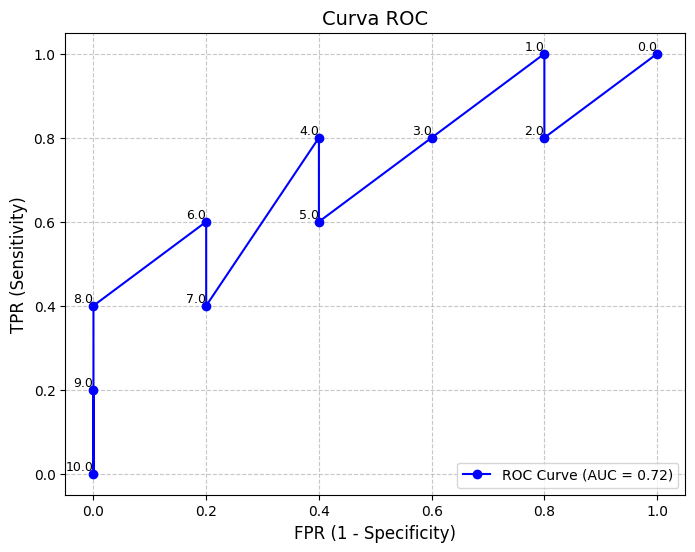

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import auc

# Crear el DataFrame con los datos
data = {
    'Step': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'True_positives': [5, 5, 4, 4, 4, 3, 3, 2, 2, 1, 0],
    'Sensitivity': [1, 1, 0.8, 0.8, 0.8, 0.6, 0.6, 0.4, 0.4, 0.2, 0],
    'True_negatives': [0, 1, 1, 2, 3, 3, 4, 4, 5, 5, 5],
    'Specificity': [0, 0.2, 0.2, 0.4, 0.6, 0.6, 0.8, 0.8, 1, 1, 1]
}

df = pd.DataFrame(data)

# Calcular la FPR (1 - Specificity)
# False positive Rate (FPR) es 1 - Specificity
df['FPR'] = 1 - df['Specificity']

# Ordenar los datos por FPR (necesario para el cálculo de AUC)
df_sorted = df.sort_values(by='FPR')

# Calcular el AUC
roc_auc = auc(df_sorted['FPR'], df_sorted['Sensitivity'])
print(f"AUC (ROC): {roc_auc:.4f}")

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(df_sorted['FPR'], df_sorted['Sensitivity'], marker='o', color='b', label=f'ROC Curve (AUC = {roc_auc:.2f})')

# Añadir etiquetas con el número de Step
for i, row in df_sorted.iterrows():
    plt.text(row['FPR'], row['Sensitivity'], str(row['Step']), fontsize=9, ha='right', va='bottom')

# Configuración del gráfico
plt.title('Curva ROC', fontsize=14)
plt.xlabel('FPR (1 - Specificity)', fontsize=12)
plt.ylabel('TPR (Sensitivity)', fontsize=12)
plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='lower right')
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)

# Mostrar la gráfica
plt.show()

### ROC Curve (Receiver Operating Characteristic Curve)

FPR = 1 - Specificity

Área bajo la curva (AUC) = capacidad general del modelo para distinguir clases.

Interpretación:

- Un AUC cercano a 1.0 indica que el modelo separa bien las clases.

- Un AUC cercano a 0.5 es como adivinar al azar.

- Puedes ajustar el threshold para balancear entre sensibilidad y especificidad dependiendo del caso (ej: medicina vs. fraude).


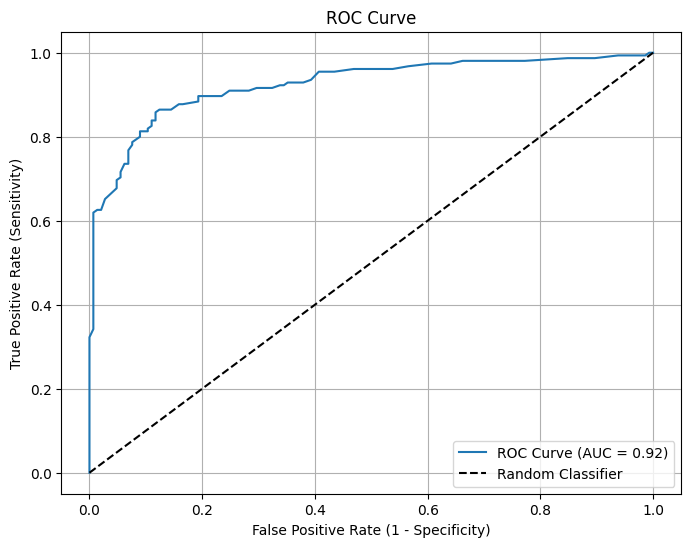

Threshold: inf | TPR (Sensitivity): 0.00 | FPR: 0.00
Threshold: 0.23 | TPR (Sensitivity): 0.92 | FPR: 0.30


In [7]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt

# 1. Simulamos datos binarios
X, y = make_classification(n_samples=1000, n_classes=2, n_features=20, random_state=42)

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Modelo
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# 4. Probabilidades predichas
y_scores = clf.predict_proba(X_test)[:, 1]  # Probabilidades clase positiva

# 5. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# 6. Gráfico
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

for i in range(0, len(thresholds), 50):
    print(f"Threshold: {thresholds[i]:.2f} | TPR (Sensitivity): {tpr[i]:.2f} | FPR: {fpr[i]:.2f}")

## Excercises

Exercise 7.1

1. What is the accuracy of the model?
  - acurrency: 4 / 10 = 0.4
What is the recall of the model?
  - recall: 3 / 3 + 2  = 2/5 = 0.4
What is the precision of the model?
  - 3 / 3 + 1 = 3 / 4 = 0.75
What is the F1-score of the model?
  - f1-score = 2 P R / P + R = 2 * 0.75 * 0.4 / 0.75 + 0.4 = 0.5217
Would you say that this is a good recommendation model?
  - 

Rango de valores del F1-score:
Mínimo: 0 (cuando precisión o recall son 0).

Máximo: 1 (solo si precisión y recall son perfectos, es decir, 1).

Comparativa:
F1 > 0.7: Bueno.

F1 ~ 0.5: Moderado (como en tu caso).

F1 < 0.3: Pobre.


Exercise 7.2

Find the sensitivity and specificity of the medical model with the following confusion matrix:

|  | Predict Sick |